# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

The target is to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [56]:
#Importing the dataset
df=pd.read_csv('loan_data.csv')

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
#cheking shape of the dataset
df.shape

(614, 13)

We have 614 rows and 13 columns.

In [59]:
#cheking column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status - Y/N (approved/not approved)

In [60]:
#Checking data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object Data type:-  Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area and Loan_status

Int data type:- ApplicantIncome

Float data type:- CoapplicantIncome,LoanAmount,Loas_Amount_term,Credit_History

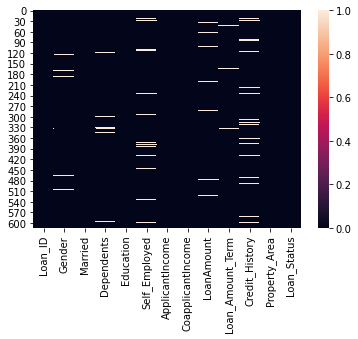

In [61]:
#Checking for null values
sns.heatmap(df.isnull())

In [62]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have null values in the following columns:- 

Gender- 13

Married- 03

Dependents- 15

Self_Employed- 32

Loan_Amount- 22

Loan_Amount_Term- 14

Credit_history- 50


In [63]:
#Treating null values (for numerical variables i.e, loan_amount,loan_amount_term, we will use mean of the respective column and for categorical variables i.e, gender,married,dependents,credit_history and self_employed we will be using the mode of the data)
cat_col=['Gender','Married','Dependents','Self_Employed','Credit_History']

for i in cat_col:
    df[i].fillna(df[i].mode()[0],inplace=True)
    
num_col=['LoanAmount','Loan_Amount_Term']

for i in num_col:
    df[i].fillna(df[i].mean(),inplace=True)

In [64]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
#Removing the Loan_ID column as it doesn't contribute towards prediction of loan approval.
df.drop(columns='Loan_ID',axis=1,inplace=True)

In [66]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [67]:
df.shape

(614, 12)

Now we have 614 rows and 12 columns.

In [68]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:

The average applicant income is 5403 and maximum is 81000.

Average coapplicant income is 1621 and highest is 41667.

The loan amount ranges from 9 to 700.

The loan amount term ranges from 12 to 480 months. And majority of applicants have opted for 360 months as 25%,50% and 75% all have 360.

Average credit history is 0.85 it means that 85% of applicants have credit history equals to 1.

# Visualization:

In [69]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Out of 614 loan applications 422 were approved.

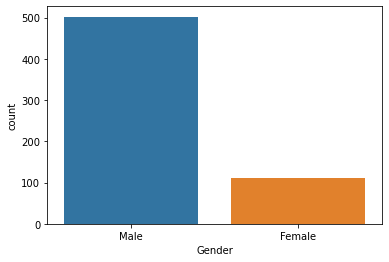

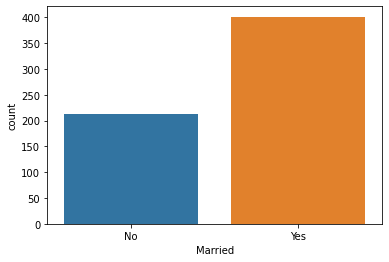

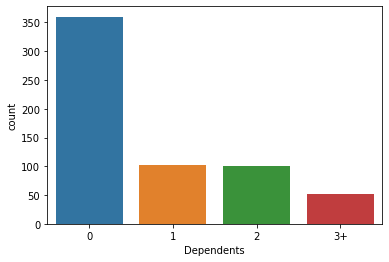

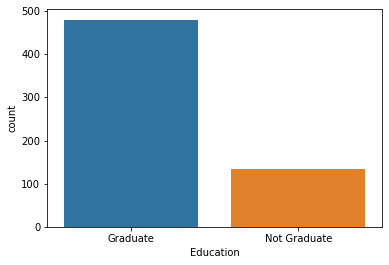

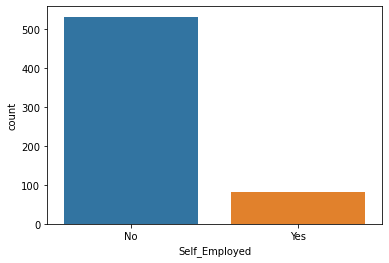

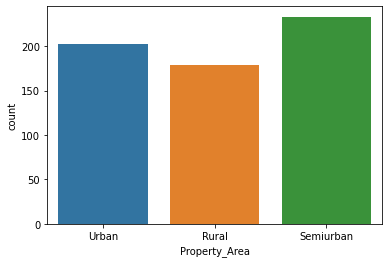

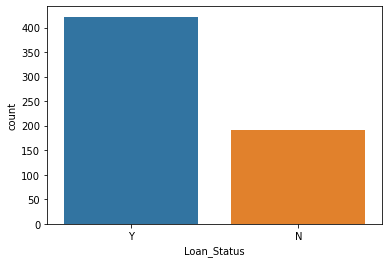

In [70]:
for i in df.columns:
    if df[i].dtypes==object:
        sns.countplot(df[i])
        plt.show()

Observations:

Most of the applicants in the dataset are male.

Most of the applicants are married.

Most of the applicants don't have dependents.

Most of the applicants are graduate.

Most of the applicants are not self-employed.

Mostly applicants are from semi-urban area.

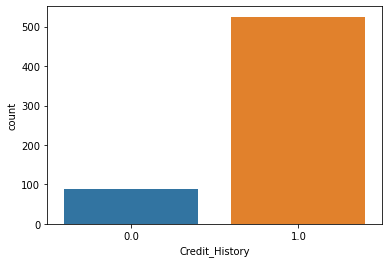

In [71]:
sns.countplot(df['Credit_History'])

Most of the applicants have good credit history.

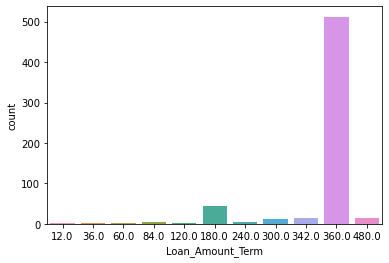

In [72]:
sns.countplot(df['Loan_Amount_Term'])

Most of the applicants have opted 360 months for loan amount terms.

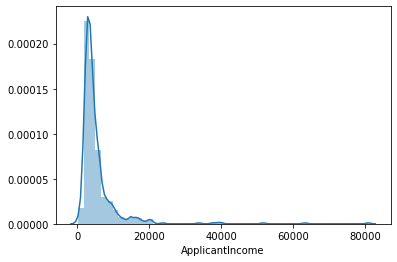

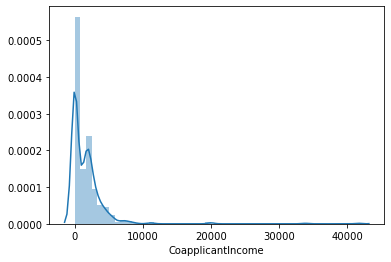

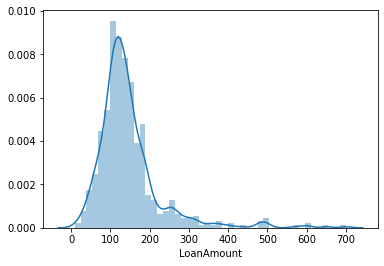

In [73]:
n_col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for i in n_col:
    sns.distplot(df[i],kde=True)
    plt.show()

Observations:

Applicant Income is left skewed and extreme values are present in the column as income varies from person to person.

Coapplicant income is also left skewed and have extreme values as well.

Loan amount also contains extreme values and data is little left skewed.

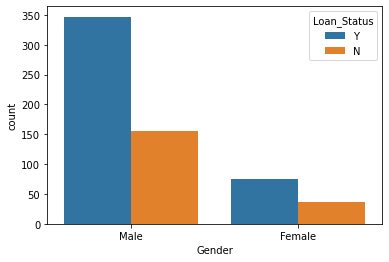

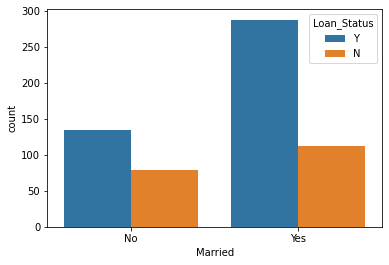

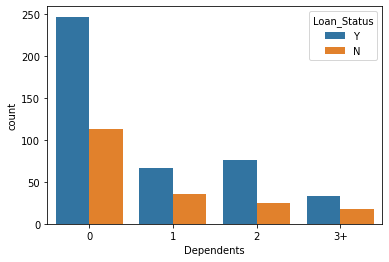

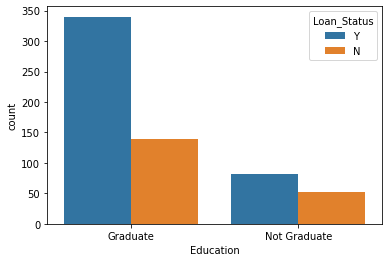

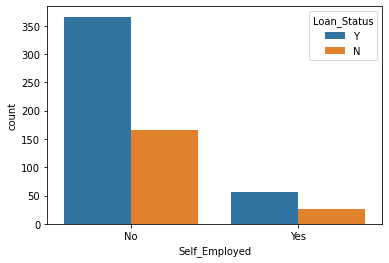

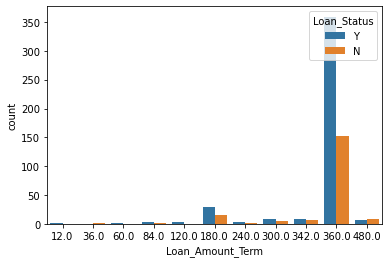

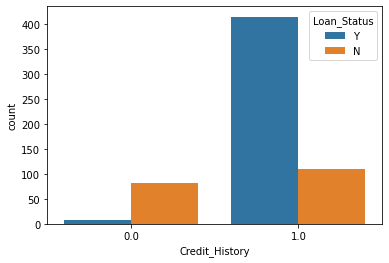

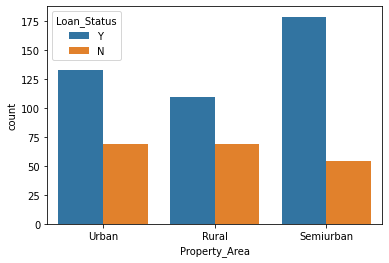

In [74]:
#Visualising Loan status vs independent variables
col=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area']
for i in col:
    sns.countplot(df[i],hue=df['Loan_Status'])
    plt.show()

Observations:

More males have taken loan than females.

Approved loans are higher for married applicants.

Approved loans for applicants having no dependents are high.

Loans of graduate applicants are likely to be approved than non graduate applicants.

Applicants which are not self employed i.e, which are salaried applicants are likely to get their loan approved.

Majority of loans are taken with 360 months of loan amount terms.

Applpicants having credit history (1) are likely to get their loan approved.

Applicants from semi urban area have higher loan approval rate.

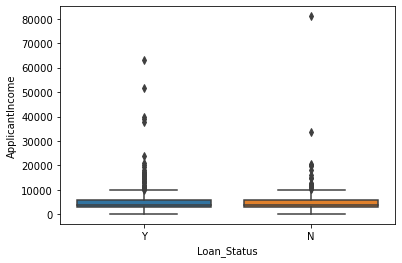

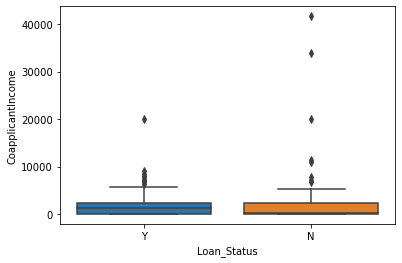

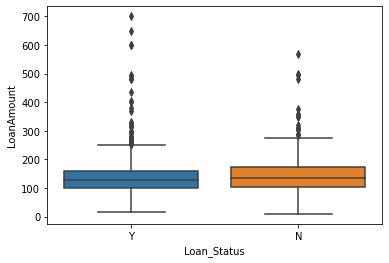

In [75]:
for i in n_col:
    sns.boxplot(x='Loan_Status',y=i,data=df)
    plt.show()

Their is no strong relation between loan status and (applicant income, coapplicant income & loan amount)

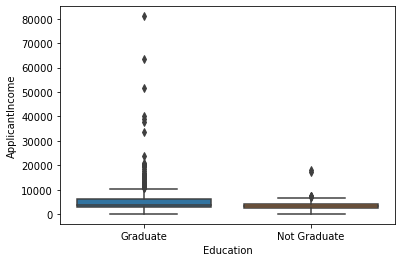

In [76]:
#Relation between applicant income and education
sns.boxplot(x='Education',y='ApplicantIncome',data=df)
plt.show()

Graduate applicants have higher income

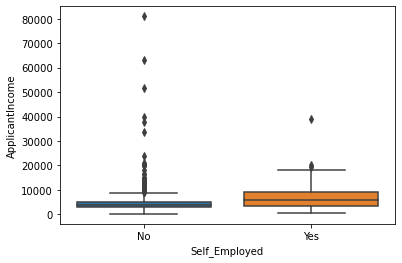

In [77]:
sns.boxplot(x='Self_Employed',y='ApplicantIncome',data=df)
plt.show()

Applicants who are not self employed have higher income.

In [78]:
#Converting object data type columns to numerical
col=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col:
    df[i] = le.fit_transform(df[i])

In [79]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


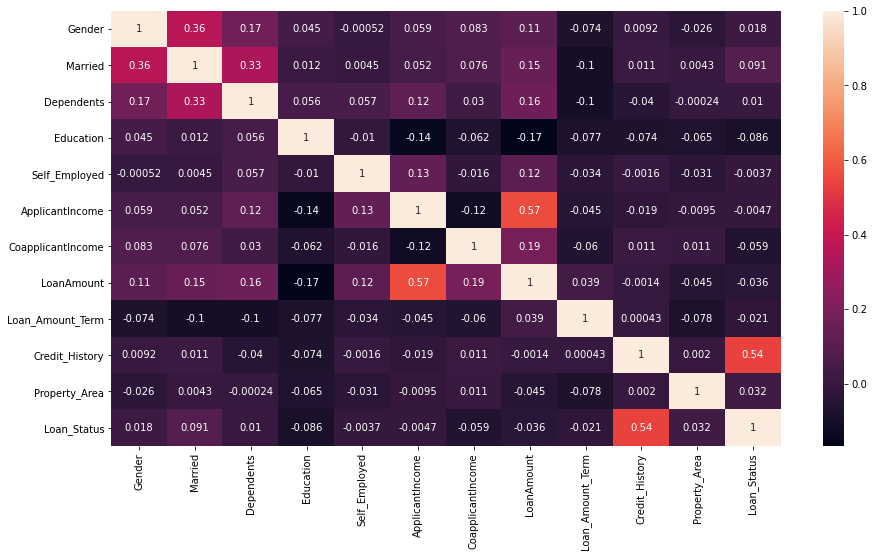

In [80]:
#Checking correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations:
    
Applicant income and loan amount are positively correlated.

Loan status and credit history are positively correalted.

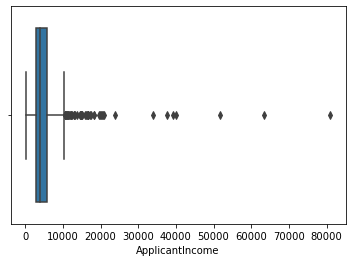

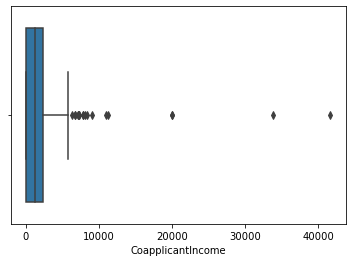

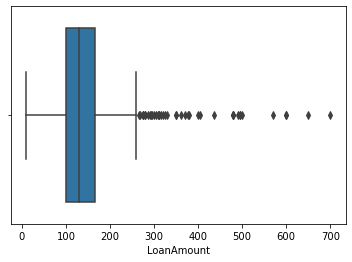

In [81]:
#Checking outiers
for i in n_col:
    sns.boxplot(df[i])
    plt.show()

Outliers are present in these columns as few people have higher income and majority of people have average income. Loan amount is also according the income of the applicant. We will not remove those extreme values.

In [82]:
#Checking skewness
for i in n_col:
    print(df[i].skew())

6.539513113994625
7.491531216657306
2.726601144105299


Keeping +/- 0.5 as the range for skewness, the above columns are highly skewed.

In [86]:
#Removing skewness
for i in n_col:
    df[i]=np.log1p(df[i])

In [87]:
for i in n_col:
    print(df[i].skew())

0.4821279953732817
-0.17307327599230946
-0.17971342301015458


In [89]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1


In [93]:
#Seperating target and independent variable
x=df.iloc[:,:11]
y=df.iloc[:,-1]

In [94]:
x.shape,y.shape

((614, 11), (614,))

# Finding the best random state:

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8648648648648649 on random state 8


In [96]:
#spliting train and test data at random state 8
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)

In [109]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [97]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [110]:
lr=LogisticRegression()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()


In [112]:
model=[lr,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))
    print('\n')

accuracy score: LogisticRegression()
0.8648648648648649
[[ 28  24]
 [  1 132]]
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185

Cross Validation Score: 0.8078368652538984
auc score: 0.7654713707345286


accuracy score: RandomForestClassifier()
0.8324324324324325
[[ 30  22]
 [  9 124]]
              precision    recall  f1-score   support

           0       0.77      0.58      0.66        52
           1       0.85      0.93      0.89       133

    accuracy                           0.83       185
   macro avg       0.81      0.75      0.77       185
weighted avg       0.83      0.83      0.82       185

Cross Validation Score: 0.7866453418632547
auc score: 0.754626951995373


accuracy score: AdaBoostClassifier(

We are getting best results with logistic regression with accuracy score- 86%, cross validation score- 80% and auc score- 76%.
F1 score for 0 is 69% and for 1 is 91%.

# Hyper parameter tuning:

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
#Hypertuning logistic regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
parameters= dict(solver=solvers,penalty=penalty,C=c_values)
GCV=GridSearchCV(lr,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [102]:
#Lets check the best parameters
GCV.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [103]:
predgcv=GCV.best_estimator_.predict(x_test)
print('accuracy score:')
print(accuracy_score(y_test,predgcv))
print(confusion_matrix(y_test,predgcv))
print(classification_report(y_test,predgcv))
score=cross_val_score(GCV.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print('auc score:',roc_auc_score(y_test,predgcv))

accuracy score:
0.8648648648648649
[[ 28  24]
 [  1 132]]
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        52
           1       0.85      0.99      0.91       133

    accuracy                           0.86       185
   macro avg       0.91      0.77      0.80       185
weighted avg       0.88      0.86      0.85       185

Cross Validation Score: 0.8078368652538984
auc score: 0.7654713707345286


The final accuracy score is 86%, cross validation score- 80% and auc score- 76%. F1 score for 0 is 69% and for 1 is 91%.

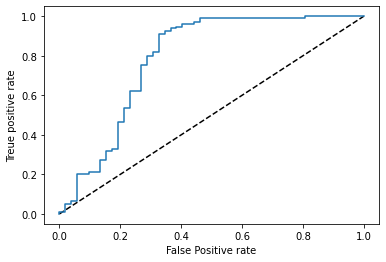

In [106]:
#Plotting the auc_roc curve
y_pred_prob=GCV.best_estimator_.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic regresion')
plt.xlabel('False Positive rate')
plt.ylabel('Treue positive rate')
plt.show()

In [119]:
#Lets save our model
import joblib
joblib.dump(GCV.best_estimator_,'loan_approval_lr.obj')

['loan_approval_lr.obj']